In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys
from collections import defaultdict

In [2]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [22]:
topo_to_log_file_dict = {
    "B4": "..\\logs\\demand_pinning_sweep_thresh\\2022_6_17_8_45_6_530\\B4_DemandPinning.txt",
    "SWAN": "..\\logs\\demand_pinning_sweep_thresh\\2022_6_17_8_45_6_530\\SWAN_DemandPinning.txt",
    "Abilene": "..\logs\\demand_pinning_sweep_thresh\\2022_6_17_8_45_6_530\\Abilene_DemandPinning.txt"
}
topo_to_num_links = {
    "B4": 38,
    "SWAN": 24,
    "Abilene": 26
}
topology_to_threshold_to_gap = defaultdict(dict)

In [28]:
for (topo, log_file) in topo_to_log_file_dict.items():
    thresh_list = []
    gap_list = []
    with open(log_file, "r") as fp:
        link_cap = int(fp.readline())
        for fline in fp.readlines():
            if fline.startswith("#"):
                continue
            thresh_perc, thresh, opt, heuristic, gap = fline.split(",")
            gap = float(gap)
            thresh_perc = float(thresh_perc)
            norm_gap = gap * 100 / (topo_to_num_links[topo] * link_cap)
            thresh_list.append(thresh_perc)
            gap_list.append(norm_gap)
    topology_to_threshold_to_gap[topo] = (thresh_list, gap_list)

In [29]:
topology_to_threshold_to_gap

defaultdict(dict,
            {'B4': ([0.0, 5.0, 10.0, 15.0],
              [2.1571069833283363e-08,
               18.157894736842213,
               20.789473684407902,
               31.973684210526315]),
             'SWAN': ([0.0, 5.0, 10.0, 15.0],
              [3.701248715515249e-08,
               8.541666671435063,
               13.333333334922791,
               21.25000001271568]),
             'Abilene': ([0.0, 5.0, 10.0, 15.0],
              [4.951922724453302e-08,
               15.384615384587132,
               38.84615384615385,
               44.03846153846154])})

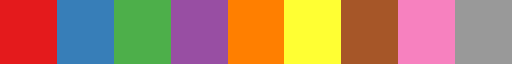

In [36]:
color_pallette = plt.get_cmap("Set1")
color_pallette

In [37]:
# colors = [color_pallette(3), color_pallette(0), color_pallette(4), color_pallette(2)]
# colors = [color_pallette(1), color_pallette(2), color_pallette(3), color_pallette(4)]
# colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(0), color_pallette(4)]
colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(4)]
line_styles = ["--", "--", "--", "--"]

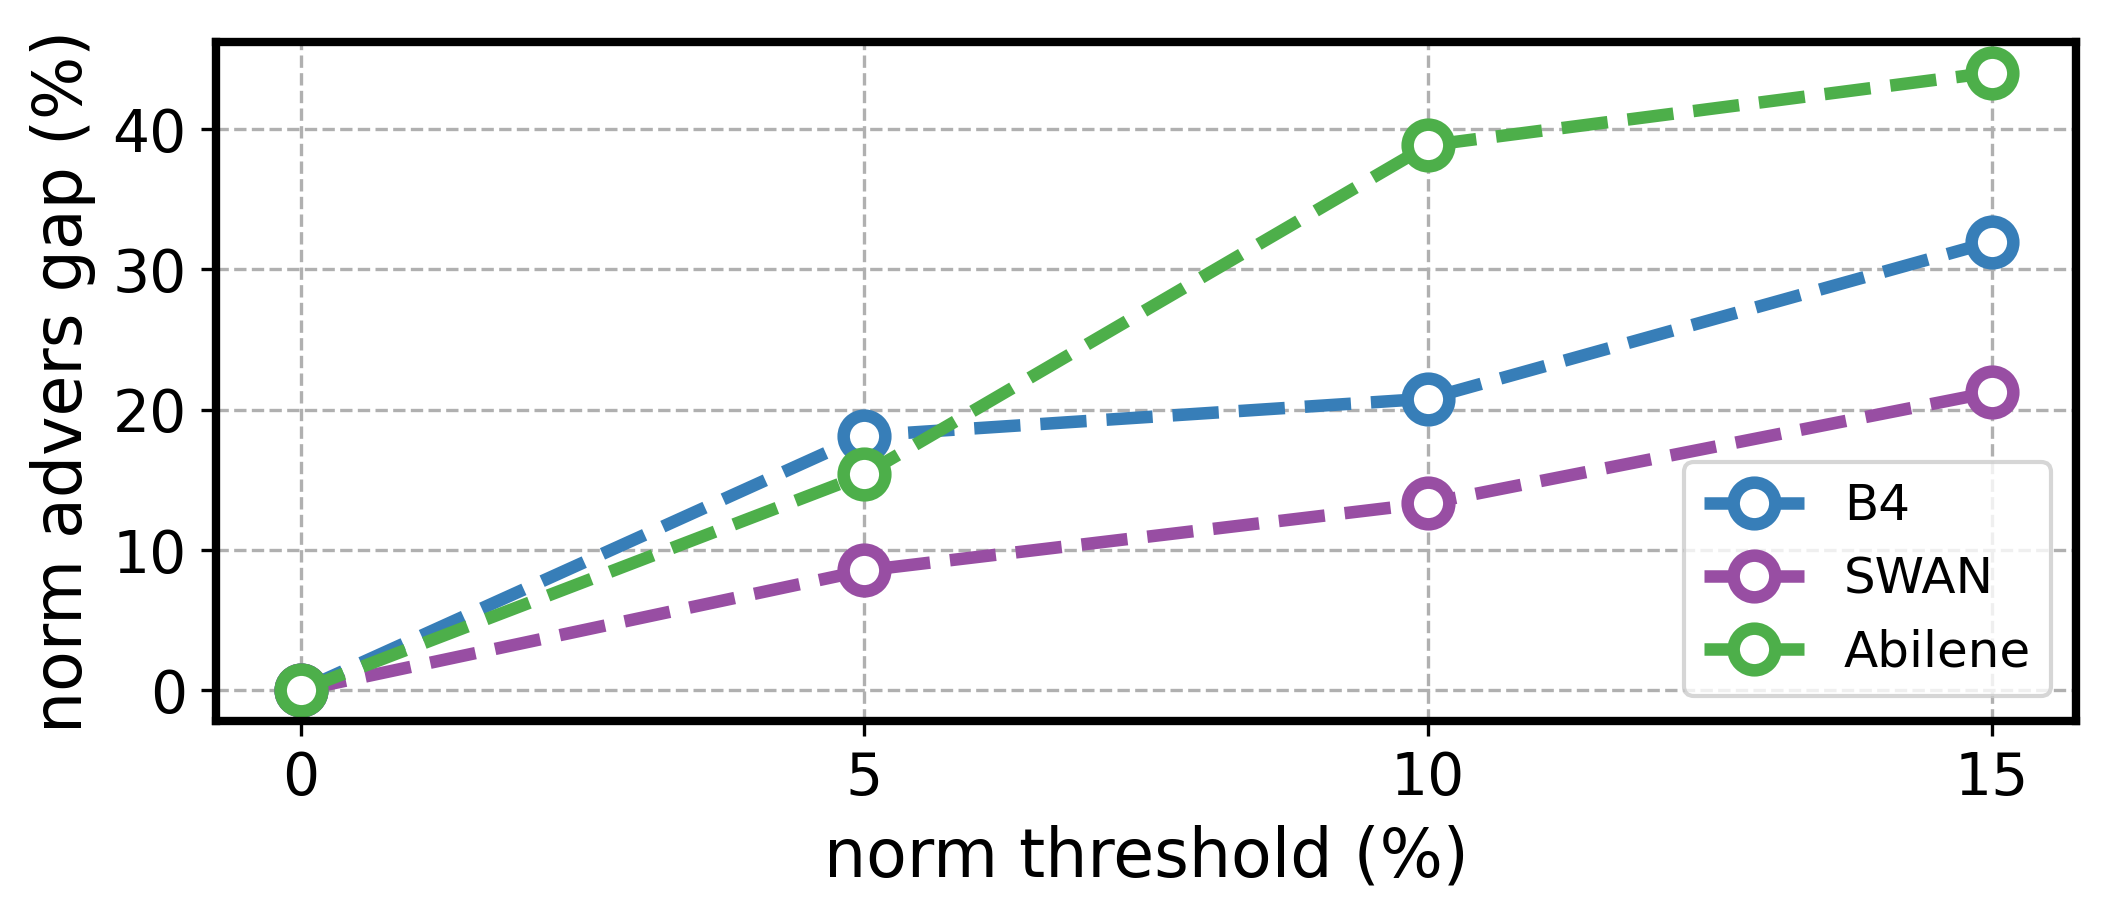

In [38]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
for idx, (topo_name, output) in enumerate(topology_to_threshold_to_gap.items()):
    plt.plot(output[0], output[1], label=f"{topo_name}", 
             color=colors[idx], 
             linestyle=line_styles[idx], 
             marker="o", 
             mfc="white", 
             mec=colors[idx], 
             markersize=10, 
             linewidth=3, 
             markeredgewidth=3
    )

plt.legend(fontsize=12, loc="lower right")
plt.xlabel("norm threshold (%)", fontsize=16)
plt.ylabel("norm advers gap (%)", fontsize=16)
# plt.xscale('log')
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 20, 5), fontsize=14)
plt.grid(which="major", zorder=-1, linestyle="--")
plt.savefig(output_fig_dir + "demandpinning_sweep_threshold.jpg", bbox_inches="tight", format="jpg", dpi=300)
plt.savefig(output_fig_dir + "demandpinning_sweep_threshold.pdf", bbox_inches="tight", format="pdf", dpi=300)